Nhập tên hãng xe:Ford
Nhập tên dòng xe:Ranger
Bạn muốn chia số km theo số có sẵn hay tự chia trả lời y hoặc nn
Nhập số km đã chạy10
số km tối đa bạn chấp nhận:150


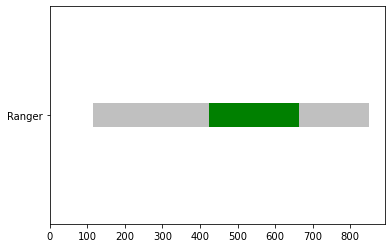

Tổng Số Data thu thập được: 21
Giá giao động trên thị trường: từ 425 triệu đến 665 triệu
Giá Trị trung vị 540


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

pd.set_option('display.max_column', None)
df = pd.read_csv(r"C:\Users\Phuoc Phe Phon\Desktop\pYTHON\data final\dataxechototfinal.csv",delimiter=';')
#clean dữ liệu giá 
price = df['Giá'].apply(lambda x : int(x.split(' ')[0].replace('.','').replace('đ','0'))/1000000)
df['Giá']=price
#chỉnh dữ liệu năm sản xuất thành int 
year= df['Năm sản Xuất'].dropna()
year = year.str.replace('trước năm','')
df['Năm sản Xuất']= year.apply(lambda x: int(x))
#lọc dữ liệu dòng xe xuất hiện trên 20 lần bỏ các giá trị không ghi dòng xe
df1 = df[df['Dòng xe'].map(df['Dòng xe'].value_counts()) >= 20]
df1 = df1[df1['Hãng']!= 'Hãng khác']
df1 = df1[(df1['Dòng xe'].notna()) & (df1['Hãng'].notna()) & (df1['Giá'].notna())]
# bỏ giá xe dưới 10 triệu đi 
df1 = df1[df1['Giá'] >= 10000000/1000000]
#dánh dấu 1 là mới 0 là đã sử dụng
df1['Tình trạng'] =df1['Tình Trạng'].apply(lambda x: 1 if 'Mới' in str(x) else 0)
df1['Tuổi'] =df1['Năm sản Xuất'].apply(lambda x: 2022-x )
# Đặt label 
tuoi =[-1,0.1,15000,30000,45000,60000,75000,90000,105000,
       120000,135000,150000,165000,180000,195000,210000,
       225000,240000,255000,270000,285000,300000,330000,
       345000,360000,375000,390000,405000,420000,435000,
       450000,465000,480000,500000,99999999999]
#thiếu 75001 - 90000km
label = ['0 Km','Dưới 15.000','15001 - 30000km','30001 - 45000km','45001 - 60000km','60001 - 75000km'
         ,'90001 - 105000km','105001 - 120000km','120001 - 135000km','135001 - 150000km'
         ,'150001 - 165000km','165001 - 180000km','180001 - 195000km','195001 - 210000km','210001 - 225000km','225001 - 240000km'
         ,'240001 - 255000km','255001 - 270000km','270001 - 285000km','285001 - 300000km','300001 - 315000km','315001 - 330000km'
         ,'330001 - 345000km','345001 - 360000km','360001 - 375000km','375001 - 390000km','390001 - 405000km','405001 - 420000km'
         ,'420001 - 435000km','435001 - 450000km','450001 - 465000km','465001 - 480000km','480001 - 500000km','trên 500000km']

label2 = list(range(1,35))
df1['label']= pd.cut(df1['số Km đã chạy'],tuoi,labels=label)
df1['Label Đánh số'] = pd.cut(df1['số Km đã chạy'],tuoi,labels=label2)
dummy = pd.get_dummies(df['Dòng xe'])
# phân loại dòng xe để 
name = str(input('Nhập tên hãng xe:'))
name2=str(input('Nhập tên dòng xe:'))
name4 = str(input('Bạn muốn chia số km theo số có sẵn hay tự chia trả lời y hoặc n' ))
if name4 == 'y':
    print('1 : 0km \n  2: Dưới 15.000 \n  3: 15001 - 30000km  \n 4: 30001 - 45000km \n....')
    name5=int(input('Label bạn muốn'))
    
else:
    name3 = int(input('Nhập số km đã chạy'))

while (True):
    if name4 == 'y':
        ten= df1[(df1['Hãng'] ==name) & (df1['Dòng xe'] ==name2) &(df1['Label Đánh số'] == name5)][['Giá']]
        if ten['Giá'].count() < 20:
            print('Không đủ dữ liệu')
            break
        test1=int(np.percentile(ten, 25))
        test2 =int(np.percentile(ten, 75))
        test3 = int(ten.max())
        test4 = int(ten.min())
        print('bạn đã chọn label '+ str(df1[df1['Label Đánh số'] == name5]['label'].iloc[0]))
        plt.barh(name2,test3,height=0.1,color='silver')
        plt.barh(name2,test2,height=0.1,color='Green')
        plt.barh(name2,test1,height=0.1,color='silver')
        plt.barh(name2,test4,color='w')
        plt.show()
        print('Tổng Số Data thu thập được: ' +str(ten['Giá'].count()))
        print('Giá giao động trên thị trường: từ ' +str(int(np.percentile(ten, 25)))+ ' triệu đến ' 
              +str(int(np.percentile(ten, 75))) + ' triệu')
        print('Giá Trị trung vị {} triệu'.format(str(int(np.percentile(ten, 50)))))
    elif  name3 == 0 :
        ten= df1[(df1['Hãng'] ==name) & (df1['Dòng xe'] ==name2) &(df1['số Km đã chạy'] == name3)][['Giá']]
        if ten['Giá'].count() < 20:
            print('Không đủ dữ liệu')
            break
        test1=int(np.percentile(ten, 25))
        test2 =int(np.percentile(ten, 75))
        test3 = int(ten.max())
        test4 = int(ten.min())
        plt.barh(name2,test3,height=0.1,color='silver')
        plt.barh(name2,test2,height=0.1,color='Green')
        plt.barh(name2,test1,height=0.1,color='silver')
        plt.barh(name2,test4,color='w')
        plt.show()
        print('Tổng Số Data thu thập được: ' +str(ten['Giá'].count()))
        print('Giá giao động trên thị trường: từ ' +str(int(np.percentile(ten, 25)))+ ' triệu đến ' 
              +str(int(np.percentile(ten, 75))) + ' triệu')
        print('Giá Trị trung vị ' +str(int(np.percentile(ten, 50))))
    elif name3 != 0 :
        name4 = int(input('số km tối đa bạn chấp nhận:'))
        ten= df1[(df1['Hãng'] ==name) & (df1['Dòng xe'] ==name2) &(df1['số Km đã chạy'] >= name3)&(df1['số Km đã chạy'] <= name4)][['Giá']]
        if ten['Giá'].count() < 20:
            print('Không đủ dữ liệu')
            break
        test1=int(np.percentile(ten, 25))
        test2 =int(np.percentile(ten, 75))
        test3 = int(ten.max())
        test4 = int(ten.min())
        plt.barh(name2,test3,height=0.1,color='silver')
        plt.barh(name2,test2,height=0.1,color='Green')
        plt.barh(name2,test1,height=0.1,color='silver')
        plt.barh(name2,test4,color='w')

        plt.show()
        print('Tổng Số Data thu thập được: ' +str(ten['Giá'].count()))
        print('Giá giao động trên thị trường: từ ' +str(int(np.percentile(ten, 25)))+ 
              ' triệu đến ' +str(int(np.percentile(ten, 75))) + ' triệu')
        print('Giá Trị trung vị ' +str(int(ten.median())))
    break
    
df2=df1.drop(['Kiểu Dáng','Xuất sứ','Nhiên liệu','Hộp số','Số Chỗ',], axis=1)
df2.to_csv(r"C:\Users\Phuoc Phe Phon\Desktop\pYTHON\data final\dataxepython.csv",encoding = 'UTF-8')


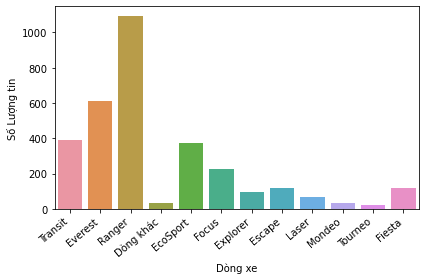

In [6]:
cate=df1[df1['Hãng']==name]['Dòng xe']
sns.countplot(x=cate.index, data=cate)
ax = sns.countplot(x=cate.index, data=cate)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.ylabel('Số Lượng tin')
plt.show()

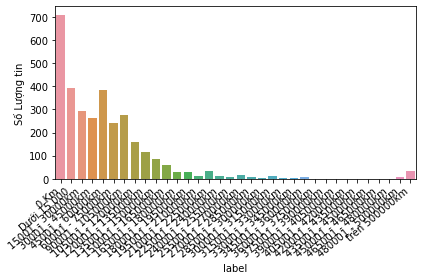

In [11]:
cate=df1[df1['Hãng']==name]['label']
sns.countplot(x=cate.index, data=cate)
ax = sns.countplot(x=cate.index, data=cate)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.ylabel('Số Lượng tin')
plt.show()